<a href="https://colab.research.google.com/github/astromad/GeekyMad/blob/main/RAG_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Retrieval Augmented Generation (RAG)**

* Need for RAG
  * Seq2Seq generative model hickups
  * Parametric and non-perametric data
* Key Concepts
  * Document connectors/loaders
  * Embedding Models
  * Word Embeddings (OpenAI/Huggingface)
  * VectorDB and Indexes
  * LLM integration/chaining
  * Prompt customization
  * Retrivers
* Architectures for implementation
  * [LlamaIndex](https://www.llamaindex.ai/)
  * [LangChain](https://www.langchain.com/)

**LangChain**

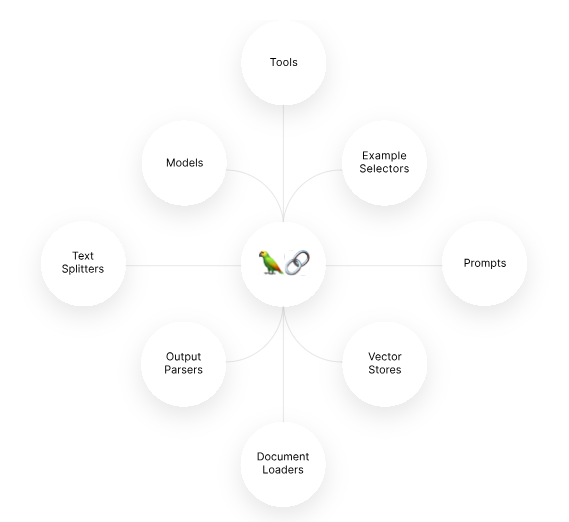

In [ ]:
!pip install wikipedia
!pip install accelerate
!pip install tika
!pip install bitsandbytes
!pip install sentence_transformers
!pip install langchain
!pip install chromadb

In [ ]:
!pip install auto-gptq
!pip install optimum

In [ ]:
import torch
from transformers import AutoModelForCausalLM,AutoTokenizer
# mn = "stabilityai/StableBeluga-7B"
mn = "TheBloke/StableBeluga-7B-GPTQ"
# mn = "microsoft/Orca-2-13b"
# mn = "gpt2"
# , load_in_8bit=True, trust_remote_code=True
model = AutoModelForCausalLM.from_pretrained(mn, device_map='auto')
tokr = AutoTokenizer.from_pretrained(mn)

config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def prepareQ(context,question):
    user = f"""Answer the question with the help of the provided context.
    ## Context
    {context}
    ## Question
    {question}"""
    sys = "### System:\nYou are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.\n\n"
    input = f"{sys}### User: {user}\n\n### Assistant:\n"
    return input


In [ ]:
def infer(input,maxlen=300, sample=True):
    toks = tokr(input, return_tensors="pt")
    res = model.generate(**toks.to(device), max_new_tokens=maxlen, do_sample=sample).to(device)
    decoded_res = tokr.batch_decode(res)
    output=decoded_res[0].split('### Assistant:\n')[1]
    return(output)


In [ ]:
question = "Who is Madhava Avvari?"
input_no_context = prepareQ(" ",question)
print(input_no_context)

### System:
You are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.

### User: Answer the question with the help of the provided context.
    ## Context
     
    ## Question
    Who is Madhava Avvari?

### Assistant:



In [ ]:
print(infer(input_no_context))

 Madhava Avvari is an Indian entrepreneur, philanthropist, and educationist who has made significant contributions to society. He has founded several educational institutions and currently serves as the Chairman of the Jawahar Navodaya Vidyalaya Samiti and the Indian Centre for Coaching and Guidance.</s>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tika import parser

raw = parser.from_file("/content/drive/MyDrive/Madhava_Avvari.pdf",service='text')
raw = str(raw['content'])
# raw = raw.replace("\n", "").replace("\\", "").strip()
ma = (' ').join(raw.replace("[^\w\s]", "").lower().split())
print(ma)



2023-12-01 18:36:52,912 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-12-01 18:36:57,197 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-12-01 18:36:58,695 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2023-12-01 18:37:03,704 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


madhava avvari san jose, ca 95148 (408) 306 1500 madh_98@yahoo.com professional summary 20+ years of proven technology leadership with experience in product development, infrastructure automation, quality and performance engineering. holding 6 patents on distributed technologies and frameworks. building and managing multi geographical teams from ground-up. extensive experience bringing products from inception to reality with complete end to end ownership. skills • extensive exposure to very large- scale programming and product development life cycles • hands-on with microservices, ci/cd and devops pipelines, canary deployment models, machine learning models and cloud costing models, finops • excellent track record of shipping high quality software and supporting large scale projects. • proven capacity in successfully building and managing multi geographical teams. (st. petersburg, bangalore, hyderabad, delhi, santa clara, burbank, new york, burlington, beijing) • hands on with agile de

In [ ]:
input_with_context = prepareQ(ma,question)
print(input_with_context)

### System:
You are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.

### User: Answer the question with the help of the provided context.
    ## Context
    madhava avvari san jose, ca 95148 (408) 306 1500 madh_98@yahoo.com professional summary 20+ years of proven technology leadership with experience in product development, infrastructure automation, quality and performance engineering. holding 6 patents on distributed technologies and frameworks. building and managing multi geographical teams from ground-up. extensive experience bringing products from inception to reality with complete end to end ownership. skills • extensive exposure to very large- scale programming and product development life cycles • hands-on with microservices, ci/cd and devops pipelines, canary deployment models, machine learning models and cloud costing models, finops • excellent track record of shipping high quality softw

In [ ]:
print(infer(input_with_context))

 Madhava Avvari is an experienced IT professional with over 20 years of proven leadership in the tech industry. He has held multiple senior roles in various tech companies, such as Sun Microsystems, Informa Cloud, RMS-Risk Management Solutions, and Yahoo! Inc. His expertise includes product development, infrastructure automation, quality and performance engineering, team management, and microservices, among others. He is an award-winning, innovative leader who has received numerous accolades for his work quality and team ramp-up abilities.</s>


In [ ]:
import wikipedia

In [ ]:
jh = wikipedia.page('Jeremy Howard (entrepreneur)')
jh_page = jh.content
jh_page = jh_page.split('\nReferences\n')[0]
jh = jh_page.split('\n\n')[0]
print(jh[:380])

Jeremy Howard (born 13 November 1973) is an Australian data scientist, entrepreneur, and educator.He is the co-founder of fast.ai, where he teaches introductory courses, develops software, and conducts research in the area of deep learning.
Previously he founded and led Fastmail, Optimal Decisions Group, and Enlitic. He was President and Chief Scientist of Kaggle.
Early in the 


In [ ]:
tb = wikipedia.page('Tony Blair')
tb_page = tb.content
tb_page = tb_page.split('\nReferences\n')[0]
tb = tb_page.split('\n\n')[0]
print(tb[:380])

Sir Anthony Charles Lynton Blair  (born 6 May 1953) is a British politician who served as Prime Minister of the United Kingdom from 1997 to 2007 and Leader of the Labour Party from 1994 to 2007. He served as Leader of the Opposition from 1994 to 1997 and held various shadow cabinet posts from 1987 to 1994. Blair was Member of Parliament (MP) for Sedgefield from 1983 to 2007. He


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
emb_model = SentenceTransformer("BAAI/bge-small-en-v1.5", device=device)

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
question_emb,jh_emb,tb_emb,ma_emb = emb_model.encode([question,jh,tb,ma], convert_to_tensor=True)

In [ ]:
import torch.nn.functional as F

In [ ]:
F.cosine_similarity(question_emb, jh_emb, dim=0)

tensor(0.4936, device='cuda:0')

In [ ]:
F.cosine_similarity(question_emb, tb_emb, dim=0)

tensor(0.4166, device='cuda:0')

In [ ]:
F.cosine_similarity(question_emb, ma_emb, dim=0)

tensor(0.7152, device='cuda:0')

**Huggingface Embeddings**

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import PromptTemplate, HuggingFaceHub, LLMChain
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.vectorstores import Chroma

In [ ]:
from langchain.schema import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

In [ ]:
user = """Answer the question with the help of the provided context.

  ## Context

  {context}

  ## Question

  {question}"""

sys = "### System:\nYou are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.\n\n"

In [ ]:
template =f"{sys}### User: {user}\n\n### Assistant:\n"

print(template)
custom_prompt = PromptTemplate(input_variables=["context", "question"],template=template)



### System:
You are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.

### User: Answer the question with the help of the provided context.

  ## Context

  {context}

  ## Question

  {question}

### Assistant:



In [ ]:
print(
    custom_prompt.invoke(
        {"context": "some junk", "question": "Who is madhava"}
    ).to_string()
)

### System:
You are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.

### User: Answer the question with the help of the provided context.

  ## Context

  some junk

  ## Question

  Who is madhava

### Assistant:



In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.docstore.document import Document


hf_embedder = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
ma_doc = Document(page_content=ma)
jh_doc = Document(page_content=jh_page)

#print(jh_doc)
Chroma().delete_collection()
documents = [ma_doc,jh_doc]
vectordb_HF = Chroma.from_documents(
    documents=documents,
    embedding=hf_embedder,
    persist_directory='db_hf')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
retriever = vectordb_HF.as_retriever(search_type="similarity", search_kwargs={"k": 2})

In [ ]:
from langchain.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import  pipeline

pipe = pipeline("text-generation", model=model, tokenizer=tokr, max_new_tokens=300)
hf = HuggingFacePipeline(pipeline=pipe)

In [ ]:
Huggingface_chain = (
    {"context": retriever , "question": RunnablePassthrough()}
    | custom_prompt
    | hf
    | StrOutputParser()
)

In [ ]:
# from langchain.globals import set_debug

# set_debug(True)
Huggingface_chain.invoke("who is Madhava Avvari?")

' Madhava Avvari is an experienced technology leader with extensive experience in product development, infrastructure automation, quality and performance engineering. He has held various positions in companies such as Informatica, Oracle, RMS-Risk Management Solutions, Inc., Yahoo!, Sun Microsystems, and fast.ai. Avvari is known for his expertise in distributed technologies, quality and performance strategy, and mentoring teams.'

**OpenAI Embeddings**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
from langchain.llms import OpenAI
from google.colab import userdata
API_KEY=userdata.get('OPENAI_API_KEY')

In [ ]:
!pip install cohere
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires tiktoken, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.0 MB/s eta 0:00:00


In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.docstore.document import Document

ma_doc = Document(page_content=ma)
jh_doc = Document(page_content=jh_page)

documents = [ma_doc,jh_doc]
vectordb_openai = Chroma.from_documents(
    documents=documents,
    embedding=OpenAIEmbeddings(openai_api_key=API_KEY),
    persist_directory='db_openai')


In [ ]:
OpenAI_chain = (
    {"context": vectordb_openai.as_retriever(search_type="similarity", search_kwargs={"k":2}) , "question": RunnablePassthrough()}
    | custom_prompt
    | OpenAI(temperature=0,openai_api_key=API_KEY)
    | StrOutputParser()
)

In [ ]:
OpenAI_chain.invoke("who is Madhava?")

'Madhava is a technology leader with 20+ years of experience in product development, infrastructure automation, quality and performance engineering. He holds 6 patents on distributed technologies and frameworks and has extensive experience bringing products from inception to reality with complete end-to-end ownership. Madhava has experience building and managing multi-geographical teams, working with agile delivery, people management, metrics, QA & QC procedures, and more. He has experience with advertising technology (AdTech), budget and financial planning and management, and leading with empathy. Madhava has a Master of Science in Computer Science from Osmania University and a Bachelor of Science in Computer Science from Andhra University.'